## I. Датасет

In [24]:
import sys
sys.path.append("E:/ML_25/homework-01-PCA")  

import mnist

In [26]:
from mnist import load_mnist
import matplotlib.pyplot as plt

In [28]:
from mnist import load_mnist
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [30]:
X_train, y_train = train
X_val, y_val = validation
X_test, y_test = test

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(55000, 28, 28, 1) (55000,)
(5000, 28, 28, 1) (5000,)
(10000, 28, 28, 1) (10000,)


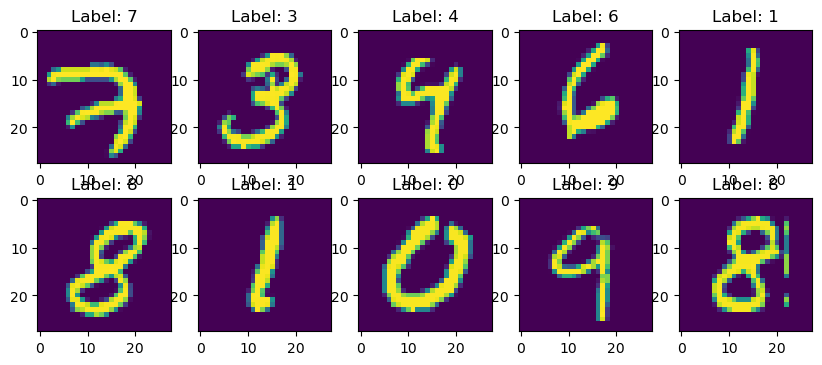

In [32]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.title(f"Label: {y_train[i]}")

plt.show()

## II. Алгоритм PCA

In [34]:
class my_PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_c = X - self.mean

        U, S, Vt = np.linalg.svd(X_c, full_matrices=False)

        self.components = Vt[:self.n_components]
        n_samples = X.shape[0]
        self.explained_variance = (S ** 2) / (n_samples - 1)
    def transform(self, X):
        X_c = X - self.mean
        return np.dot(X_c, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

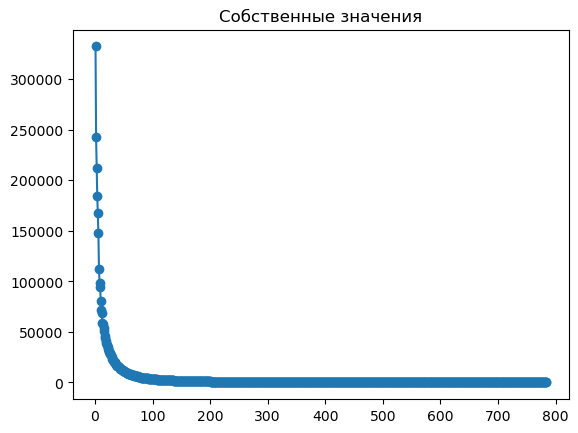

In [45]:
import numpy as np
import matplotlib.pyplot as plt
X = X_train.reshape(X_train.shape[0], -1)
pca = my_PCA(n_components=50)
X_transformed = pca.fit_transform(X)
eigenvalues = pca.explained_variance
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o")
plt.title("Собственные значения")
plt.show()

Собственные значения (eigenvalues) упорядочены в порядке убывания.

Каждое собственное число соответствует дисперсии данных вдоль соответствующей главной компоненты.

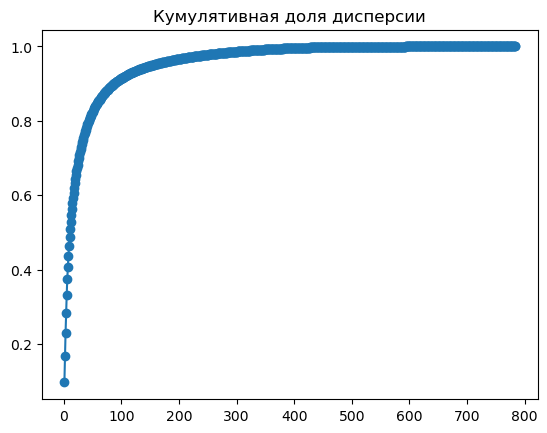

Доля дисперсии для первых 15 компонент: 0.5791247436307821


In [50]:
cumulative = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(cumulative) + 1), cumulative, marker="o")
plt.title("Кумулятивная доля дисперсии")
plt.show()

cumulative = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print("Доля дисперсии для первых 15 компонент:", cumulative[14])

Каждое собственное число-это дисперсия данных по своей главной компоненте.

Суммой всех собственных чисел будет полная дисперсия данных.

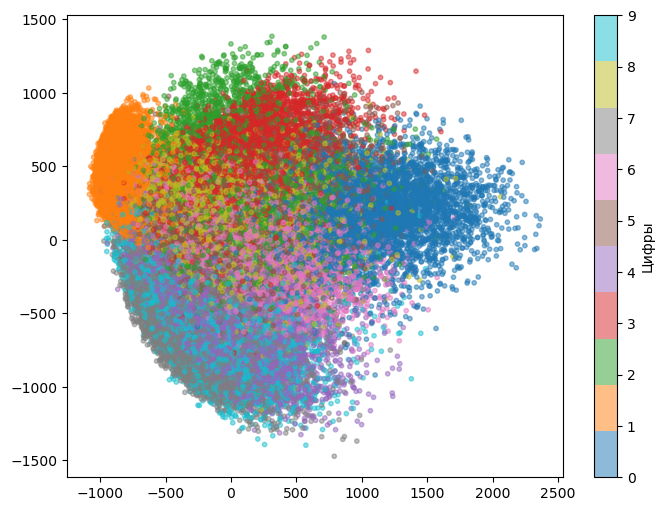

In [53]:
pca_2d = my_PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=y_train, cmap="tab10", alpha=0.5, s=10)
plt.colorbar(scatter, ticks=range(10), label="Цифры")
plt.show()

График датасета в первых двух координатах главных компонент:

Классы не идеально разделимы линейно в 2D (много наложений).

Некоторые цифры образуют более компактную среду. Дргуие сильно пересекаются.

## III. Алгоритм kNN

In [59]:
import numpy as np
from collections import Counter

In [61]:
class my_kNN:
    def __init__(self, n_neighbors=7):
        self.n_neighbors = n_neighbors
    
    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def predict(self, X):
        y_pred = []
        for x in X:
          distances = np.linalg.norm(self.X_train - x, axis=1)
          k_indices = np.argsort(distances)[:self.n_neighbors]
          k_nearest_labels = self.y_train[k_indices]
          most_common = Counter(k_nearest_labels).most_common(1)[0][0]
          y_pred.append(most_common)

        return np.array(y_pred)

In [63]:
from sklearn.model_selection import train_test_split 
X_train_new, X_test, y_train_new, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Выводы:

1. Применила метод главных компонент (PCA):

Собственные значения показывают, сколько дисперсии (разброса данных) объясняет каждая компонента.

Кумулятивная доля дисперсии показала, что первые 15 главных компонент покрывают значительную часть дисперсии данных, что позволяет уменьшить размерность без существенной потери информации.

График первых двух компонент позволил визуально оценить распределение цифр

2. Написала собственный класс my_kNN, который:

сохраняет обучающие данные (fit),

вычисляет расстояния до всех обучающих точек,

выбирает k ближайших соседей и возвращает наиболее часто встречающийся класс (predict).

- PCA позволяет выявлять структуру данных и уменьшать размерность без существенной потери информации.
- kNN - классификатор для MNIST, особенно при использовании данных после снижения размерности через PCA.